# <center> Control Bootcamp </center>
<center><i><b>Course by:</b> Steve Brunton <i></center>
<center><i><b>Notes by:</b> Matt Capuano <i></center>

<b>Note: </b> These are NOT my notes from the course, only a few things here and there I decided to try. The majority of the notes are in a word document in my knowledge database: {insert website url when created}

Playlist: 
https://www.youtube.com/watch?v=Pi7l8mMjYVE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m

<h2>Lecture 1 | Control Bootcamp: Overview</h2>

<b>Open Loop Control:</b> A type of active control (pumping energy into the system) where you invert the system to actively change its behavior to get a desired output $y$. You pre-plan a trajectory and enact the control law, without actually checking back on the state.
* Dr. Brunton gives the example of an inverted pendulum: it turns out you can just input a high-frequency up and down sinusoidal wave and it will stabilize. Some examples:
    * https://www.youtube.com/watch?v=rwGAzy0noU0
    * https://www.youtube.com/watch?v=JY_SIQLSEFg
    * https://www.youtube.com/watch?v=5oGYCxkgnHQ

I don't implement this but we'll see more about this type of control when we study frequency response.

<h2>Lecture 2 | Linear Systems</h2>

We saw that the solution to:
$$\dot{x} = Ax$$
is 
$$x(t) = e^{At}x(0)$$
But how do you take the exponent of a matrix? With the Taylor series approximation:
$$e^{At} = I + At + \frac{A^2 t^2}{2}! + \frac{A^3 t^3}{3!} + ...$$
However, computing this for large matrices is not practical. In practice, we diagonalize the matrix $A$ and express the dynamics in the coordinate frame corresponding to the eigenvectors of this diagonalization:
$$AT = TD$$
$$D = T^{-1}AT$$
Basically, $T$ is the coordinate transform matrix, where $z$ are the coordinates in new coordinate frame:
$$x = Tz$$

Check the derivation in my notes, when you solve for the dynamics in this new coordinate system:
$$\dot{x} = T\dot{z}$$
you get to:
$$\dot{z} = Dz$$


In [1]:
# Example Diagonalization
import numpy as np

# Define some random matrix A
A = np.array([[1, 2,  3],
              [3, 2,  1],
              [1, 0, -1]])
print("A =\n", A, "\n")

# Getting the diagonalization (i.e. eigenvalues and eigenvectors) for some matrix A:
w, T = np.linalg.eig(A)
print("Eigenvalues: ", np.around(w, decimals=3), "\n")
print("Eigenvectors:\nT = \n", np.around(T, decimals=3), "\n")

# The D matrix is the diagonal matrix of eigenvalues of A:
D = np.diag(w)
print("D =\n", np.around(D, decimals=3), "\n")

# You can get D from D = T'AT as well:
print("T^{-1}AT = \n", np.around(np.linalg.inv(T).dot(A).dot(T), decimals=3), "\n")

# You can equivalently get A from A = TDT':
print("TDT^{-1} = \n", np.around(T.dot(D).dot(np.linalg.inv(T)), decimals=2))

A =
 [[ 1  2  3]
 [ 3  2  1]
 [ 1  0 -1]] 

Eigenvalues:  [ 4.317 -2.317  0.   ] 

Eigenvectors:
T = 
 [[ 0.584  0.736  0.408]
 [ 0.804 -0.382 -0.816]
 [ 0.11  -0.559  0.408]] 

D =
 [[ 4.317  0.     0.   ]
 [ 0.    -2.317  0.   ]
 [ 0.     0.     0.   ]] 

T^{-1}AT = 
 [[ 4.317  0.    -0.   ]
 [ 0.    -2.317 -0.   ]
 [ 0.     0.     0.   ]] 

TDT^{-1} = 
 [[ 1.  2.  3.]
 [ 3.  2.  1.]
 [ 1.  0. -1.]]


This is convenient because if:
$$A=TDT^{-1}$$
Then we get (by taking the Taylor Approximation, check notes):
$$e^{At} = e^{TDT^{-1}t}$$
$$e^{At} = Te^{Dt}T^{-1}$$
Such that our entire solution becomes:
$$x(t) = Te^{Dt}T^{-1}x(0)$$

<h2>Lecture 26 | Example Frequency Response (Bode Plot) For Spring-Mass-Damper</h2>

Here we look at the Frequency response for a spring-mass-damper system, which has equation of motion given by:
$$m\ddot{x} + d\dot{x} + kx = u$$
We let the mass, damping coefficient, and spring constant equal 1 for simplicity, then:
$$\ddot{x} + \dot{x} + x = u$$
Taking the Laplace transform, we get that the transfer function is:
$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{s^2 + s + 1}$$

In [7]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import control.matlab as cmatlab
import slycot
from scipy import signal

# Plotting settings (to format plots nicely)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

Transfer Function:
 
     1
-----------
s^2 + s + 1



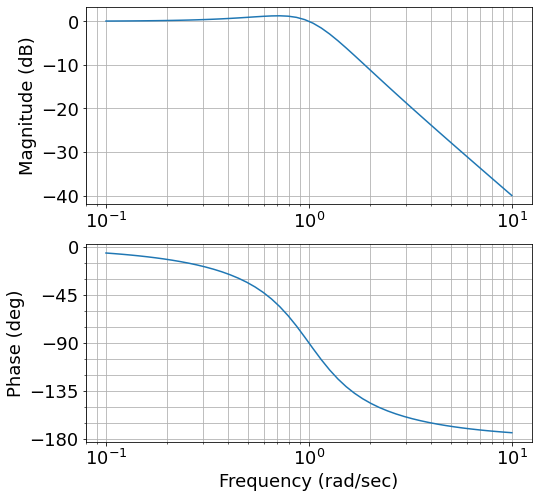

In [27]:
# Define s as being the transfer function Laplace variable
s = cmatlab.tf('s')

# Transfer function:
G = 1 / (s**2 + s + 1)
print("Transfer Function:\n", G)

# Get the Bode plot, I think this command just feeds in a bunch of omegas and computes G for each
w, mag, phase = cmatlab.bode(G, dB=True) # True is the default, but I leave it to show you can adjust y dB vs log

Note how the Magnitude starts at 0, as does the phase if I could just get this to test below 10^-1. Then there's a magnitude peak at the resonant frequency, and then it drops....

For the more general system, try messing around with the m, d, and k values and see how that affects the system. Some notes from observations:
1. **Mass:** ... Seems to have the reverse effect as damping ...
2. **Damping:**
    1. Small damping leads to much higher peak magnitude (though not above a certain max) and much faster drop rate in phase.
    2. High damping means no peak resonance at all, very high damping even splits the phase drop into two.
3. **Spring Constant:** ... Seems to have the reverse effect as damping, so same as mass ...

Transfer Function:
 
       1
---------------
s^2 + 0.1 s + 1



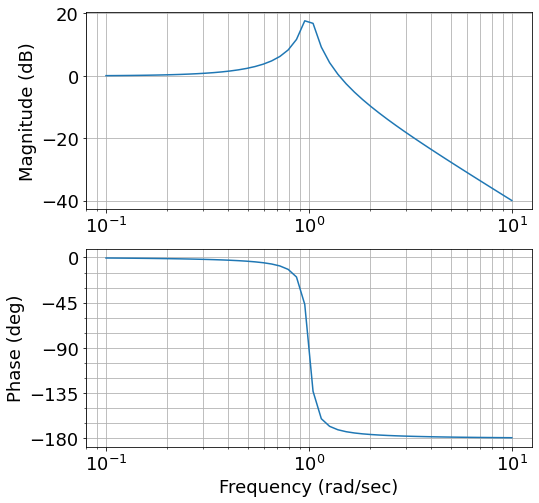

In [24]:
m = 1
d = 0.1
k = 1

# Transfer function:
G = 1 / (m*(s**2) + d*s + k)
print("Transfer Function:\n", G)

# Get the Bode plot, I think this command just feeds in a bunch of omegas and computes G for each
w, mag, phase = cmatlab.bode(G)

<h3>Impulse response</h3>
You can also use this transfer function to compute the impulse response of the transfer function.

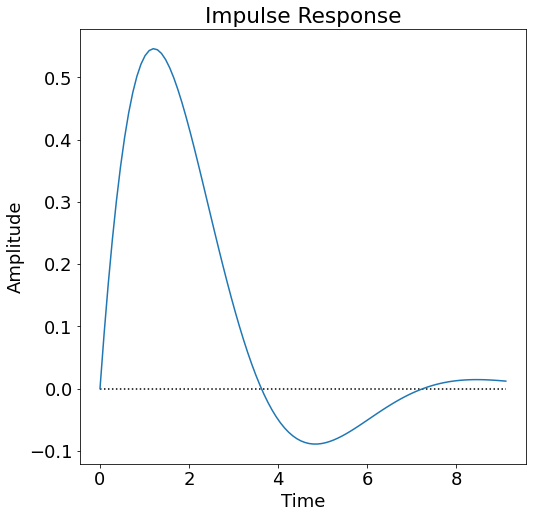

In [5]:
# Redefining the parameters and Transfer function here for convenience:
m = 1
d = 1
k = 1
G = 1 / (m*(s**2) + d*s + k)

impulseAmplitude, impulseTime = cmatlab.impulse(G)

plt.plot(impulseTime[[0, -1]], np.array([0, 0]), 'k:')
plt.plot(impulseTime, impulseAmplitude)
plt.title('Impulse Response')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()

<h3>Step response</h3>

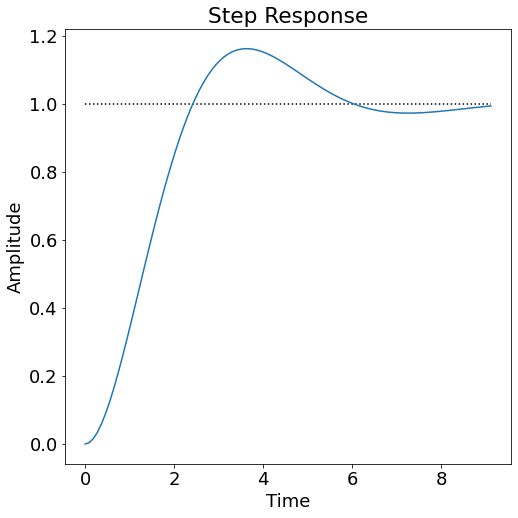

In [41]:
# Redefining the parameters and Transfer function here for convenience:
m = 1
d = 1
k = 1
G = 1 / (m*(s**2) + d*s + k)

stepAmplitude, stepTime = cmatlab.step(G)

plt.plot(stepTime[[0, -1]], np.array([1, 1]), 'k:')
plt.plot(stepTime, stepAmplitude)
plt.title('Step Response')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()